## TODO
* Import the required files
* Create an instance of VGG
* Finetune the model with the new data
* Predict on the test set
* Outuput the predictions in a format that can be uplaodaed to Kaggle

## Imports

In [2]:
from __future__ import division, print_function
import re
import pandas as pd

import utils ; reload(utils)
from utils import plots

import vgg16 ; reload(vgg16)
from vgg16 import Vgg16

%matplotlib inline

Using gpu device 0: Tesla K80 (CNMeM is disabled, cuDNN 5103)
/home/ubuntu/anaconda2/lib/python2.7/site-packages/theano/sandbox/cuda/__init__.py:600: UserWarning: Your cuDNN version is more recent than the one Theano officially supports. If you see any problems, try updating Theano or downgrading cuDNN to version 5.
  warnings.warn(warn)
Using Theano backend.


set up a path argument to allow for rapid iteration on sample data

In [3]:
#sample path
#path = 'data/sample/'
# full path
path = 'data/'
batch_size = 64

instantiate model class and take a look at some samples:
* **Note:** We are using some keras under the covers in our get_batches method. its just a simple wrapper for keras.gen.flow_from_directory, with appropriate default parameters
we should either our 200 sample images or our 25k regular images depending

In [4]:
vgg = Vgg16()
batches = vgg.get_batches(path+'train', batch_size=batch_size)

/home/ubuntu/anaconda2/lib/python2.7/site-packages/keras/layers/core.py:621: UserWarning: `output_shape` argument not specified for layer lambda_1 and cannot be automatically inferred with the Theano backend. Defaulting to output shape `(None, 3, 224, 224)` (same as input shape). If the expected output shape is different, specify it via the `output_shape` argument.
  .format(self.name, input_shape))


Found 25000 images belonging to 2 classes.


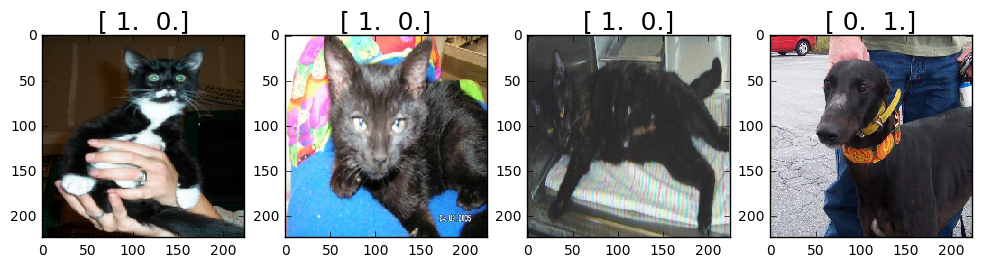

In [91]:
#batches is an iterator for images and labels - grab the next one
imgs, lbls = next(batches)
# plots is a wrapper for plotting a number of images
plots(imgs[0:4], titles=lbls)

## finetune the model

In [92]:
valid_batches = vgg.get_batches(path+'valid', batch_size=batch_size)
# put our model into finetune mode - this pops the last layer off, freezes above layers, 
# and adds a new last layer to train. uses keras.model.pop() to remove the last layer
vgg.finetune(batches)
# fit the model
vgg.fit(batches, valid_batches, nb_epoch=1)

Found 2000 images belonging to 2 classes.
Epoch 1/1
25000/25000 [==============================] - 689s - loss: 0.1118 - acc: 0.9692 - val_loss: 0.0363 - val_acc: 0.9890


In [93]:
vgg.fit(batches, valid_batches, nb_epoch=1)

Epoch 1/1
25000/25000 [==============================] - 690s - loss: 0.1047 - acc: 0.9757 - val_loss: 0.0522 - val_acc: 0.9845


In [94]:
vgg.fit(batches, valid_batches, nb_epoch=1)

Epoch 1/1
25000/25000 [==============================] - 690s - loss: 0.0967 - acc: 0.9796 - val_loss: 0.0407 - val_acc: 0.9885


In [95]:
vgg.fit(batches, valid_batches, nb_epoch=1)

Epoch 1/1
25000/25000 [==============================] - 690s - loss: 0.1006 - acc: 0.9786 - val_loss: 0.0330 - val_acc: 0.9910


In [97]:
vgg.fit(batches, valid_batches, nb_epoch=1)

Epoch 1/1
25000/25000 [==============================] - 689s - loss: 0.0983 - acc: 0.9798 - val_loss: 0.0538 - val_acc: 0.9880


In [99]:
vgg.fit(batches, valid_batches, nb_epoch=1)

Epoch 1/1
25000/25000 [==============================] - 689s - loss: 0.1080 - acc: 0.9799 - val_loss: 0.0358 - val_acc: 0.9900


In [112]:
vgg.model.optimizer.lr = 0.01

In [113]:
vgg.fit(batches, valid_batches, nb_epoch=1)

Epoch 1/1
25000/25000 [==============================] - 689s - loss: 0.1104 - acc: 0.9806 - val_loss: 0.0378 - val_acc: 0.9925


In [114]:
vgg.fit(batches, valid_batches, nb_epoch=1)

Epoch 1/1
25000/25000 [==============================] - 690s - loss: 0.1064 - acc: 0.9814 - val_loss: 0.0358 - val_acc: 0.9920


In [115]:
vgg.fit(batches, valid_batches, nb_epoch=1)

Epoch 1/1
25000/25000 [==============================] - 690s - loss: 0.1103 - acc: 0.9804 - val_loss: 0.0520 - val_acc: 0.9905


In [116]:
vgg.model.optimizer.lr = 0.001

In [117]:
vgg.fit(batches, valid_batches, nb_epoch=1)

Epoch 1/1
25000/25000 [==============================] - 703s - loss: 0.1120 - acc: 0.9810 - val_loss: 0.0445 - val_acc: 0.9915


In [118]:
vgg.fit(batches, valid_batches, nb_epoch=1)

Epoch 1/1
25000/25000 [==============================] - 708s - loss: 0.1246 - acc: 0.9798 - val_loss: 0.0450 - val_acc: 0.9915


In [119]:
vgg.model.save_weights('models/ft1.h5')

## output in the desired format
we want to output a csv that has the id, and the probability as columns

In [5]:
vgg.model.load_weights('models/ft1.h5')

In [8]:
# setting shuffle=False here is VERY important for file ordering. Score will be TERRIBLE otherwise
test_batches = vgg.get_batches(path+'test', batch_size=batch_size*2, shuffle=False)

# get names
filepaths = test_batches.filenames
filenames = []
for name in filepaths:
    filenames.append(int(re.findall("(\d{1,6})", name)[0]))

# get predictions
preds = vgg.model.predict_generator(test_batches, val_samples=12500)
dog_scores = preds[:, 1]    
dog_scores = dog_scores.clip(min=0.0085, max=0.9915)

filenames = pd.Series(filenames, name='id')
scores = pd.Series(dog_scores, name='label')
submission = pd.concat([filenames, scores], axis=1).sort_values('id', ascending=True)
submission.to_csv('submission.csv', index=False)
submission.head(5)

Found 12500 images belonging to 1 classes.


,id,label
7082,1,0.9915
4067,2,0.9915
3558,3,0.9915
5730,4,0.9915
2852,5,0.0085
